In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

In [ ]:
ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temp_shum_multi_level/temp_q-{2024}.nc")
ds_shum

<xarray.Dataset> Size: 121MB
Dimensions:         (valid_time: 1712, pressure_level: 17, latitude: 26,
                     longitude: 20)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 14kB 2024-03-01 ... 2024-09-3...
  * pressure_level  (pressure_level) float64 136B 1e+03 975.0 ... 200.0 100.0
  * latitude        (latitude) float64 208B 26.75 26.5 26.25 ... 21.0 20.75 20.5
  * longitude       (longitude) float64 160B 88.0 88.25 88.5 ... 92.5 92.75
    expver          (valid_time) <U4 27kB ...
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 61MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 61MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-26T11:18 GRIB to CDM+CF via cfgrib-0.9.1...

# Temperature

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

mean_list=[]

for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temp_shum_multi_level/temp_q-{year}.nc")
  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  weights=np.cos(np.deg2rad(ds_shum.latitude))
  weights.name='weights'
  ds_shum_weighted = ds_shum.weighted(weights)
  BD_mean_shum = ds_shum_weighted.mean(['longitude','latitude'])
  BD_mean_shum=BD_mean_shum.assign_coords(event_no=event_no)
  mean_list.append(BD_mean_shum)
# lshf_anom
shum_events_mean_mam=xr.concat(mean_list,dim='event_no')
shum_events_mean_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')


  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list


,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

mean_list=[]

for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temp_shum_multi_level/temp_q-{year}.nc")
  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  weights=np.cos(np.deg2rad(ds_shum.latitude))
  weights.name='weights'
  ds_shum_weighted = ds_shum.weighted(weights)
  BD_mean_shum = ds_shum_weighted.mean(['longitude','latitude'])
  BD_mean_shum=BD_mean_shum.assign_coords(event_no=event_no)
  mean_list.append(BD_mean_shum)
# lshf_anom
shum_events_mean_jjas=xr.concat(mean_list,dim='event_no')
shum_events_mean_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')


  0%|          | 0/135 [00:00<?, ?it/s]

# Specific Humidity

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

mean_list=[]

for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temp_shum_multi_level/temp_q-{year}.nc")
  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  weights=np.cos(np.deg2rad(ds_shum.latitude))
  weights.name='weights'
  ds_shum_weighted = ds_shum.weighted(weights)
  BD_mean_shum = ds_shum_weighted.mean(['longitude','latitude'])
  BD_mean_shum=BD_mean_shum.assign_coords(event_no=event_no)
  mean_list.append(BD_mean_shum)
# lshf_anom
shum_events_mean_mam=xr.concat(mean_list,dim='event_no')
shum_events_mean_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')


  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list


,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly
# @title Event data for composite analysis-anomaly
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

mean_list=[]

for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temp_shum_multi_level/temp_q-{year}.nc")
  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  weights=np.cos(np.deg2rad(ds_shum.latitude))
  weights.name='weights'
  ds_shum_weighted = ds_shum.weighted(weights)
  BD_mean_shum = ds_shum_weighted.mean(['longitude','latitude'])
  BD_mean_shum=BD_mean_shum.assign_coords(event_no=event_no)
  mean_list.append(BD_mean_shum)
# lshf_anom
shum_events_mean_jjas=xr.concat(mean_list,dim='event_no')
shum_events_mean_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')


  0%|          | 0/135 [00:00<?, ?it/s]

# Combine Plot

In [ ]:
shum_vertical_clim_mam = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/temp&q_vertical_climatology-mam.nc")

weights=np.cos(np.deg2rad(shum_vertical_clim_mam.latitude))
weights.name='weights'
shum_vertical_clim_mam_weighted = shum_vertical_clim_mam.weighted(weights)
shum_vertical_clim_mam = shum_vertical_clim_mam_weighted.mean(['longitude','latitude'])
shum_vertical_clim_mam = shum_vertical_clim_mam.sel(pressure_level=slice(1000,500))

shum_vertical_clim_jjas = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/temp&q_vertical_climatology-jjas.nc")

weights=np.cos(np.deg2rad(shum_vertical_clim_jjas.latitude))
weights.name='weights'
shum_vertical_clim_jjas_weighted = shum_vertical_clim_jjas.weighted(weights)
shum_vertical_clim_jjas = shum_vertical_clim_jjas_weighted.mean(['longitude','latitude'])
shum_vertical_clim_jjas = shum_vertical_clim_jjas.sel(pressure_level=slice(1000,500))
shum_vertical_clim_jjas

<xarray.Dataset> Size: 316B
Dimensions:         (pressure_level: 13)
Coordinates:
  * pressure_level  (pressure_level) float64 104B 1e+03 975.0 ... 550.0 500.0
    number          int32 4B 0
Data variables:
    q               (pressure_level) float64 104B 0.01944 0.01886 ... 0.004533
    t               (pressure_level) float64 104B 300.8 299.2 ... 274.3 270.7

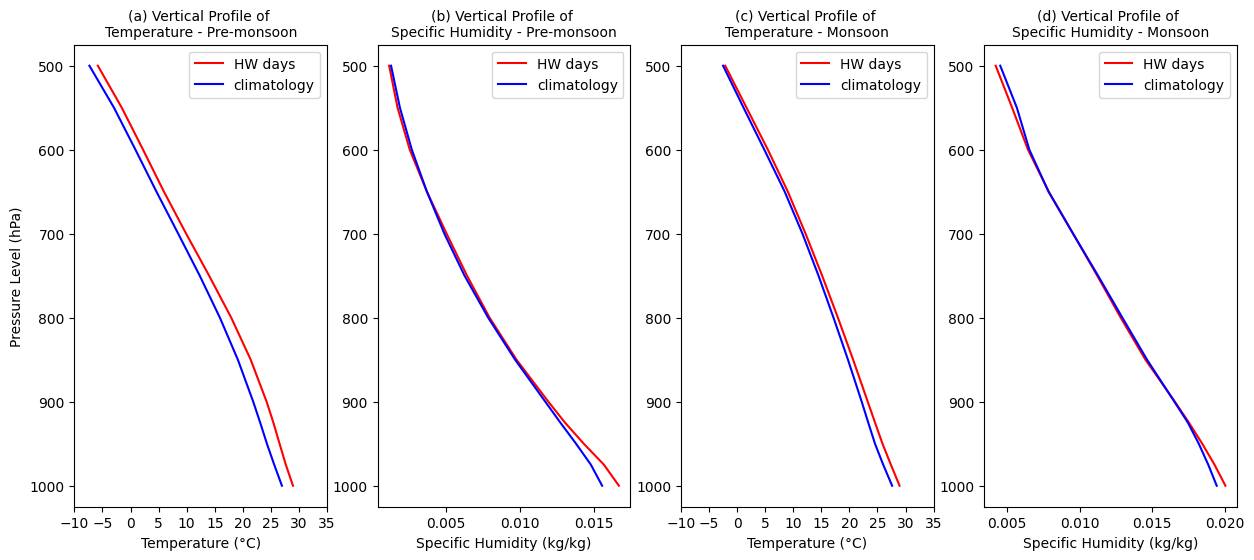

In [ ]:
levels_temp=np.arange(-5, 5+ 0.0001, 1)
levels_shum=np.arange(-0.003, 0.003 + 0.0001, 0.0005)

fig,axes=plt.subplots(ncols=4,nrows=1,figsize=(15, 6))

# temp premonsoon
ax=axes.flat[0]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['t'].values-273.15, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_mam['t'].values-273.15, shum_vertical_clim_mam['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure Level (hPa)')
ax.set_title("(a) Vertical Profile of \nTemperature - Pre-monsoon", fontsize=10)
ax.legend()
ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#shum premonsoon
ax=axes.flat[1]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['q'].values, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_mam['q'].values, shum_vertical_clim_mam['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Specific Humidity (kg/kg)')
# ax.set_ylabel('Pressure Level (hPa)')
ax.set_title("(b) Vertical Profile of \nSpecific Humidity - Pre-monsoon", fontsize=10)
ax.legend()
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#temp monsoon
ax=axes.flat[2]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['t'].values-273.15, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_jjas['t'].values-273.15, shum_vertical_clim_jjas['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Temperature (°C)')
ax.set_title("(c) Vertical Profile of \nTemperature - Monsoon", fontsize=10)
ax.legend()
ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#shum monsoon
ax=axes.flat[3]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['q'].values, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_jjas['q'].values, shum_vertical_clim_jjas['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Specific Humidity (kg/kg)')
ax.set_title("(d) Vertical Profile of \nSpecific Humidity - Monsoon", fontsize=10)
ax.legend()
# ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

plt.show()

In [ ]:
print('done')

done


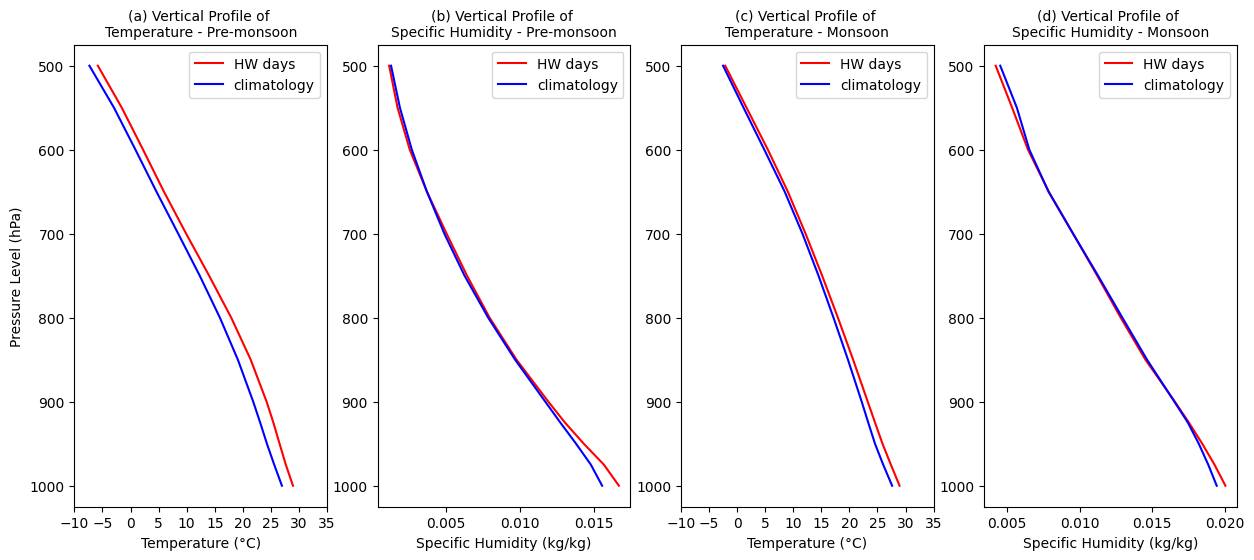

In [ ]:
levels_temp=np.arange(-5, 5+ 0.0001, 1)
levels_shum=np.arange(-0.003, 0.003 + 0.0001, 0.0005)

fig,axes=plt.subplots(ncols=4,nrows=1,figsize=(15, 6))

# temp premonsoon
ax=axes.flat[0]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['t'].values-273.15, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_mam['t'].values-273.15, shum_vertical_clim_mam['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Pressure Level (hPa)')
ax.set_title("(a) Vertical Profile of \nTemperature - Pre-monsoon", fontsize=10)
ax.legend()
ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#shum premonsoon
ax=axes.flat[1]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-mam.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['q'].values, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_mam['q'].values, shum_vertical_clim_mam['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Specific Humidity (kg/kg)')
# ax.set_ylabel('Pressure Level (hPa)')
ax.set_title("(b) Vertical Profile of \nSpecific Humidity - Pre-monsoon", fontsize=10)
ax.legend()
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#temp monsoon
ax=axes.flat[2]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['t'].values-273.15, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_jjas['t'].values-273.15, shum_vertical_clim_jjas['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Temperature (°C)')
ax.set_title("(c) Vertical Profile of \nTemperature - Monsoon", fontsize=10)
ax.legend()
ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

#shum monsoon
ax=axes.flat[3]
shum_vertical = xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_q_events_mean_on_vertical_levels-jjas.nc')
shum_vertical = shum_vertical.mean(dim='event_no', skipna=True)
shum_vertical = shum_vertical.sel(pressure_level=slice(1000,500))

ax.plot(shum_vertical['q'].values, shum_vertical['pressure_level'].values,color='red',label='HW days')
ax.plot(shum_vertical_clim_jjas['q'].values, shum_vertical_clim_jjas['pressure_level'].values,color='blue',label='climatology')

ax.set_xlabel('Specific Humidity (kg/kg)')
ax.set_title("(d) Vertical Profile of \nSpecific Humidity - Monsoon", fontsize=10)
ax.legend()
# ax.set_xticks(np.arange(-10, 35 + 0.0001, 5))
ax.set_yticks(np.arange(500, 1000 + 0.0001, 100))
ax.invert_yaxis()

plt.show()

In [ ]:
print('executed all the lines')


executed all the lines
